# Exploratory Data Analysis - Biometric

In [191]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
import seaborn as sns

import time
import os

import math
import scipy.stats as stats

In [192]:
# enrollment = pd.read_csv('Cleaned Datasets/cleaned_enrollment.csv')
biometric = pd.read_csv('Cleaned Datasets/cleaned_biometric.csv')
# demography = pd.read_csv('Cleaned Datasets/cleaned_demographic.csv')

if not os.path.exists('Biometric Images'):
    os.makedirs('Biometric Images')

print("Successfully loaded the Cleaned Datasets")

Successfully loaded the Cleaned Datasets


## 1. Analysing Enrollment Data

In [194]:
biometric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861107 entries, 0 to 1861106
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   date             object
 1   state            object
 2   district         object
 3   pincode          int64 
 4   bio_age_5_17     int64 
 5   bio_age_17+      int64 
 6   total_biometric  int64 
dtypes: int64(4), object(3)
memory usage: 99.4+ MB


In [195]:
biometric['date'] = pd.to_datetime(biometric['date'])
biometric.rename(columns={"bio_age_17_": "bio_age_17+"}, inplace=True)
biometric['pincode'] = biometric['pincode'].astype(str)

biometric.to_csv("Cleaned Datasets/cleaned_biometric.csv", index=False)

In [196]:
biometric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861107 entries, 0 to 1861106
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   state            object        
 2   district         object        
 3   pincode          object        
 4   bio_age_5_17     int64         
 5   bio_age_17+      int64         
 6   total_biometric  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 99.4+ MB


In [197]:
biometric.describe(include='all')

,date,state,district,pincode,bio_age_5_17,bio_age_17+,total_biometric
count,1861107,1861107,1861107,1861107,1.861107e+06,1.861107e+06,1.861107e+06
unique,NaN,36,794,19707,NaN,NaN,NaN
top,NaN,Tamil Nadu,Anantapur,500055,NaN,NaN,NaN
freq,NaN,184569,18372,474,NaN,NaN,NaN
mean,2025-10-22 22:32:03.125107456,NaN,NaN,NaN,1.839059e+01,1.909414e+01,3.748473e+01
min,2025-03-01 00:00:00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,2025-09-18 00:00:00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,3.000000e+00
50%,2025-11-04 00:00:00,NaN,NaN,NaN,3.000000e+00,4.000000e+00,8.000000e+00
75%,2025-12-04 00:00:00,NaN,NaN,NaN,1.100000e+01,1.000000e+01,2.200000e+01
max,2025-12-29 00:00:00,NaN,NaN,NaN,8.002000e+03,7.625000e+03,1.338100e+04


In [198]:
biometric.head(10)

,date,state,district,pincode,bio_age_5_17,bio_age_17+,total_biometric
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,857
1,2025-03-01,Uttar Pradesh,Ghazipur,233232,168,47,215
2,2025-03-01,West Bengal,West Midnapore,721133,47,153,200
3,2025-03-01,Gujarat,Anand,388335,24,70,94
4,2025-03-01,Rajasthan,Rajsamand,313322,79,76,155
5,2025-03-01,Rajasthan,Churu,331301,96,157,253
6,2025-03-01,Madhya Pradesh,Anuppur,484336,100,119,219
7,2025-03-01,Odisha,Kalahandi,766027,266,221,487
8,2025-03-01,Odisha,Dhenkanal,759023,149,204,353
9,2025-03-01,Gujarat,Vadodara,391125,25,142,167


In [199]:
def validate_sample_significance(df, target_col, n, confidence=0.95):
    """
    Validates if a sample size n is statistically significant for a given target column.
    """
    N = len(df)
    
    # 1. Calculate Population Statistics
    sigma = df[target_col].std()
    mu = df[target_col].mean()
    
    # Safety Check: If mean is 0, we can't calculate relative error
    if mu == 0:
        print(f"SKIPPING '{target_col}': Mean is 0, cannot calculate relative error.")
        return

    # 2. Calculate Margin of Error (Finite Population Correction included)
    z_score = stats.norm.ppf((1 + confidence) / 2)
    standard_error = (sigma / math.sqrt(n)) * math.sqrt((N - n) / (N - 1))
    
    moe_absolute = z_score * standard_error
    moe_relative = (moe_absolute / mu) * 100
    
    # 3. Report
    print(f"VALIDATION REPORT for '{target_col}'")
    print(f"Population Mean: {mu:.2f} | Std Dev: {sigma:.2f}")
    print(f"Sample Size: {n:,} ({(n/N)*100:.1f}% of data)")
    print(f"Margin of Error: ±{moe_relative:.2f}% (at {confidence*100:.0f}% confidence)")
    
    if moe_relative < 5:
        print("STATUS: EXCELLENT (High Precision)")
    elif moe_relative < 10:
        print("STATUS: ACCEPTABLE (Good for General Trends)")
    else:
        print("STATUS: CAUTION (High Variance / Insufficient Sample)")
    print("-" * 40)

In [200]:
# --- USAGE FOR DEMOGRAPHY DATASET ---

# Define the sample size you are planning to use (e.g., 10% or a fixed number like 50k)
# Given you have 2M rows, a 50,000 sample is usually very robust.
sample_size = 20000 

# Run validation on your key numerical columns
print(f"checking sample validity for N={sample_size}...\n")

validate_sample_significance(biometric, 'total_biometric', sample_size)
validate_sample_significance(biometric, 'bio_age_5_17', sample_size)
validate_sample_significance(biometric, 'bio_age_17+', sample_size)

checking sample validity for N=20000...

VALIDATION REPORT for 'total_biometric'
Population Mean: 37.48 | Std Dev: 162.33
Sample Size: 20,000 (1.1% of data)
Margin of Error: ±5.97% (at 95% confidence)
STATUS: ACCEPTABLE (Good for General Trends)
----------------------------------------
VALIDATION REPORT for 'bio_age_5_17'
Population Mean: 18.39 | Std Dev: 83.70
Sample Size: 20,000 (1.1% of data)
Margin of Error: ±6.27% (at 95% confidence)
STATUS: ACCEPTABLE (Good for General Trends)
----------------------------------------
VALIDATION REPORT for 'bio_age_17+'
Population Mean: 19.09 | Std Dev: 88.07
Sample Size: 20,000 (1.1% of data)
Margin of Error: ±6.36% (at 95% confidence)
STATUS: ACCEPTABLE (Good for General Trends)
----------------------------------------


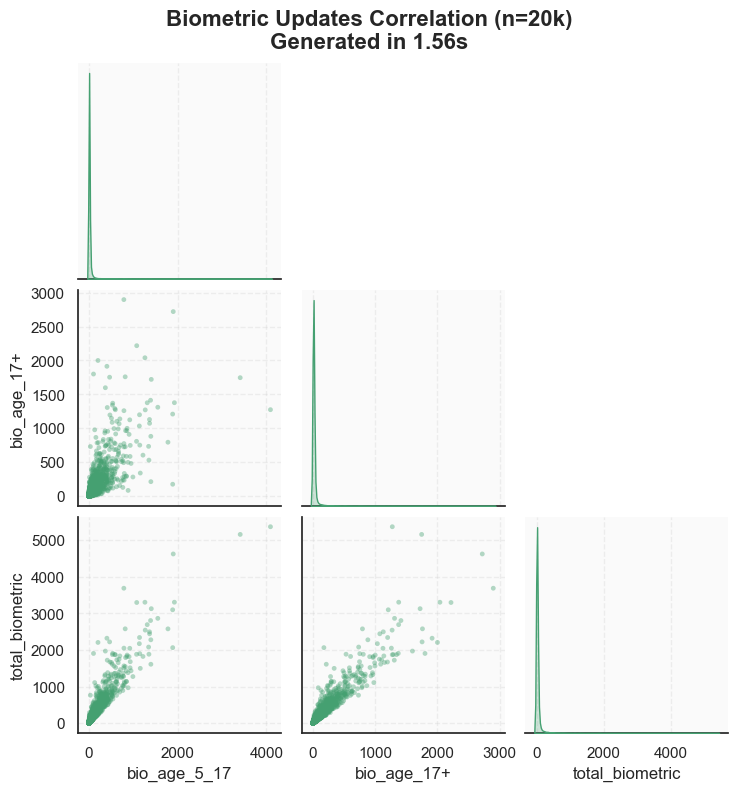

In [201]:
# --- 2. Generate the Plot ---
start_time = time.time()

# Sample from the NEW 'biometric' dataset (n=20k for performance)
# Ensure the 'biometric' dataframe is already loaded in your environment
biometric_sample = biometric.sample(n=min(20000, len(biometric)), random_state=42)

# Set style
sns.set_theme(style="white", rc={"axes.facecolor": "#fafafa"})

# Use Aadhaar Green for consistency with the Biometric theme
plot_color = '#45A071' 

g = sns.pairplot(
    biometric_sample,
    vars=['bio_age_5_17', 'bio_age_17+', 'total_biometric'],
    diag_kind='kde',
    corner=True,  # Removes redundant plots and makes more room for title
    plot_kws={'alpha': 0.4, 's': 12, 'color': plot_color, 'edgecolor': 'none'},
    diag_kws={'color': plot_color, 'fill': True}
)

# --- 3. Formatting & Titles ---
plt.suptitle(f'Biometric Updates Correlation (n=20k)\nGenerated in {time.time() - start_time:.2f}s', 
             y=1.05, fontsize=16, fontweight='bold', ha='center')

# Add subtle grid for clarity
for ax in g.axes.flatten():
    if ax:
        ax.grid(True, linestyle='--', alpha=0.3)

plt.show()


In [202]:
# --- 1. BIOMETRIC: Check if the sum of parts equals the total ---
# Calculating the sum of age segments for comparison
calculated_total = biometric['bio_age_5_17'] + biometric['bio_age_17+']
sum_check = calculated_total == biometric['total_biometric']

# Identify mismatches
mismatches = len(biometric) - sum_check.sum()

print(f"Total Records Analyzed: {len(biometric):,}")
print(f"Number of rows with inconsistent totals: {mismatches:,}")

# --- 3. Optional: Inspect Mismatches ---
if mismatches > 0:
    print("\nSAMPLE OF INCONSISTENT ROWS:")
    # Display the first few rows where the calculation doesn't match the reported total
    error_sample = biometric[~sum_check].head(5).copy()
    error_sample['calculated_diff'] = error_sample['total_biometric'] - (error_sample['bio_age_5_17'] + error_sample['bio_age_17+'])
    display(error_sample[['date', 'state', 'bio_age_5_17', 'bio_age_17+', 'total_biometric', 'calculated_diff']])
else:
    print("STATUS: Data Integrity Verified (100% Match)")
print("-" * 30)

Total Records Analyzed: 1,861,107
Number of rows with inconsistent totals: 0
STATUS: Data Integrity Verified (100% Match)
------------------------------


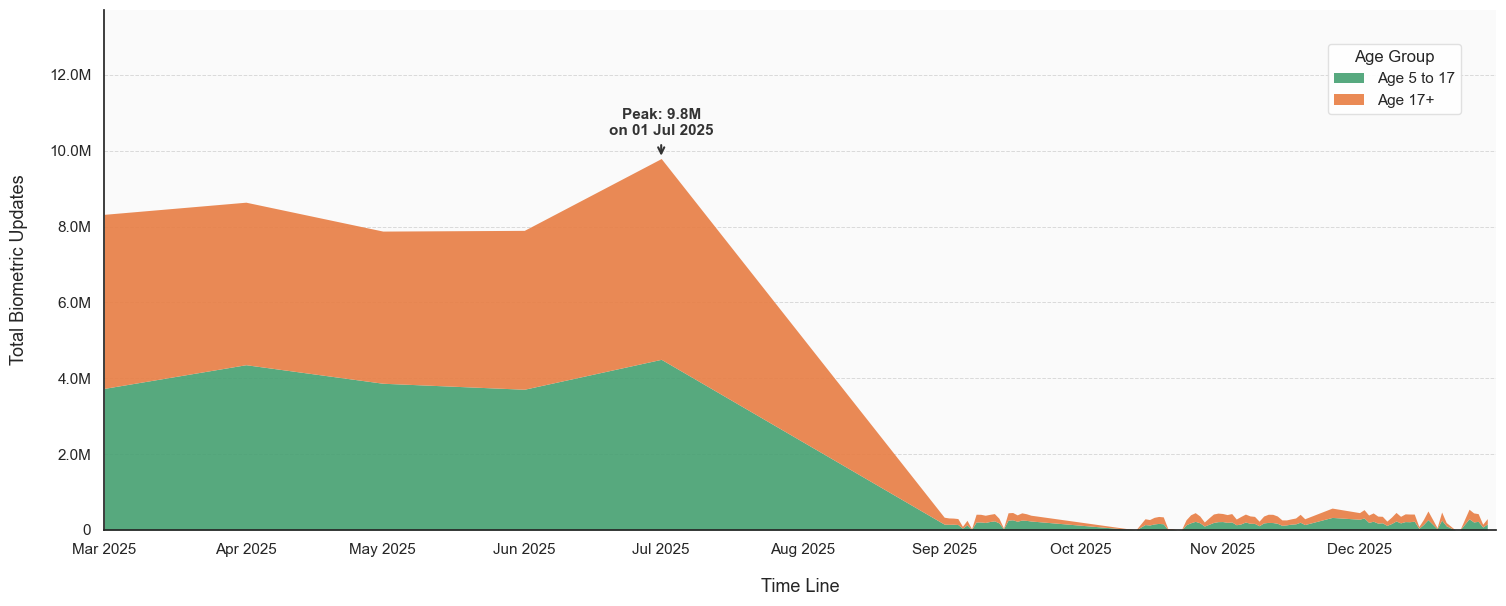

In [203]:
# --- Helper Function for Dynamic Formatting (K and M) ---
def format_km(n, pos=None):
    if n >= 1_000_000:
        return f'{n/1_000_000:.1f}M'
    elif n >= 1_000:
        return f'{n/1_000:.0f}K'
    return f'{n:.0f}'

# Set style
sns.set_theme(style="white", rc={"axes.facecolor": "#fafafa"})

# --- 1. Data Processing (Biometric) ---
biometric['date'] = pd.to_datetime(biometric['date'])
# Group by date and sum biometric age segments
daily_trend = biometric.groupby('date')[['bio_age_5_17', 'bio_age_17+']].sum()
daily_trend.columns = ['Age 5 to 17', 'Age 17+']

# --- 2. Plotting ---
fig, ax = plt.subplots(figsize=(16, 8))

# Aadhaar Brand Colors: Deep Green for 5-17, Deep Orange for 17+
# These match the 'deepened' theme used in the Demography reports
colors = ['#45A071', '#E87D43'] 

# Area Plot
daily_trend.plot(kind='area', stacked=True, alpha=0.9, ax=ax, color=colors, linewidth=0)

# --- 3. Dynamic Titles ---
#fig.text(x=0.08, y=0.96, s='Daily Biometric Update Volume', 
#         fontsize=22, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s=f"Cumulative daily biometric updates ({daily_trend.index.min().strftime('%b %Y')} - {daily_trend.index.max().strftime('%b %Y')})", 
#         fontsize=14, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- 4. Legend & Limits ---
ax.legend(title='Age Group', title_fontsize='12', fontsize='11',
          loc='upper right', bbox_to_anchor=(0.98, 0.95), 
          frameon=True, framealpha=0.9, facecolor='white', edgecolor='#dddddd')

total_daily = daily_trend.sum(axis=1)
peak_value = total_daily.max()
peak_date = total_daily.idxmax()

ax.set_ylim(0, peak_value * 1.4 if peak_value > 0 else 100)
ax.margins(x=0)
# Adjust x-limit based on biometric data range
ax.set_xlim(daily_trend.index.min(), daily_trend.index.max() + pd.Timedelta(days=2))

# --- 5. Formatting ---
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_km))

plt.xticks(rotation=0, ha='center', fontsize=11)
plt.yticks(fontsize=11)

ax.set_ylabel('Total Biometric Updates', fontsize=13, labelpad=15)
ax.set_xlabel('Time Line', fontsize=13, labelpad=15)

# Aesthetics
sns.despine()
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7, color='#cccccc', alpha=0.7)

# --- 6. Annotation ---
if peak_value > 0:
    peak_label = format_km(peak_value)
    peak_date_str = peak_date.strftime('%d %b %Y') 
    
    is_at_start = peak_date <= (daily_trend.index.min() + pd.Timedelta(days=7))
    
    ax.annotate(f'Peak: {peak_label}\non {peak_date_str}',
                xy=(peak_date, peak_value),
                xytext=(25 if is_at_start else 0, 15), 
                textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='#333333', lw=1.5),
                fontsize=11, color='#333333', 
                ha='left' if is_at_start else 'center',
                va='bottom', 
                fontweight='bold', 
                bbox=dict(boxstyle='round,pad=0.3', fc='#fafafa', ec='none', alpha=0.8))

# Final Layout Adjustments
plt.subplots_adjust(top=0.85, left=0.08, right=0.95)

    
plt.savefig('Biometric Images/Biometric_updates_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

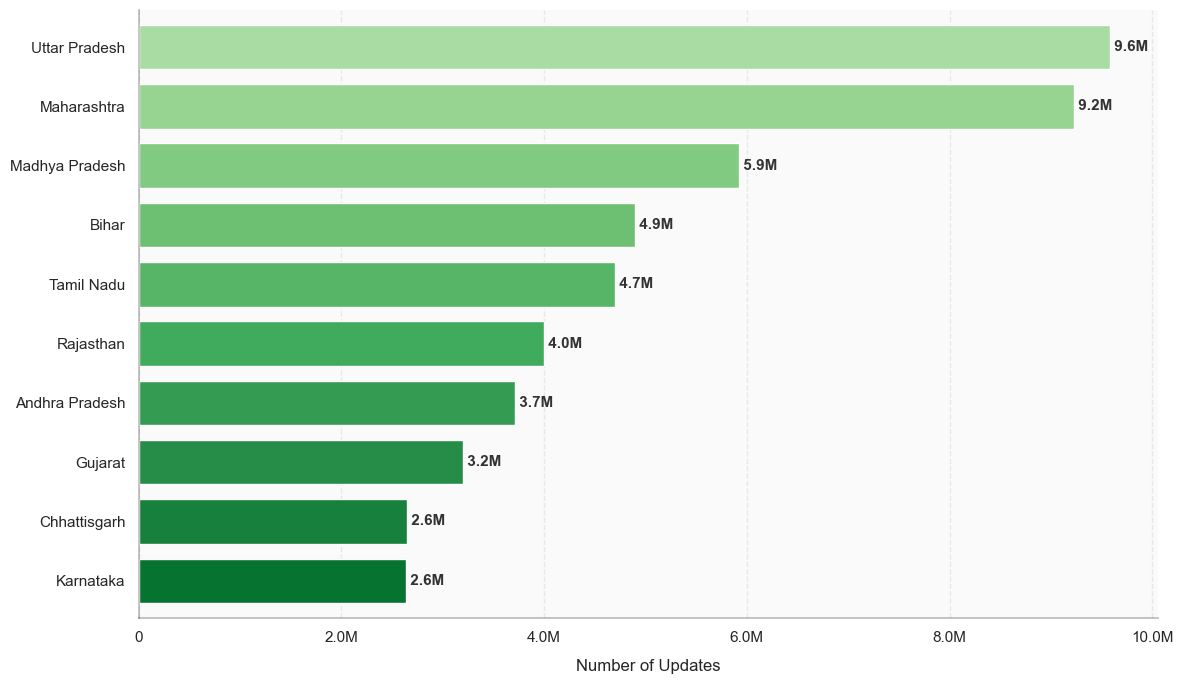

In [204]:
# --- Data Preparation (Biometric) ---
# Calculate total updates for biometric (summing both demographics)
if 'total_biometric_sum' not in biometric.columns:
    biometric['total_biometric_sum'] = biometric['bio_age_5_17'] + biometric['bio_age_17+']

# Get top 10 states by biometric volume
top_states_bio = biometric.groupby('state')['total_biometric_sum'].sum().nlargest(10).sort_values()

# --- Plotting ---
plt.figure(figsize=(12, 7))

# --- Gradient Logic ---
# cm.Greens(0.1) is very light, cm.Greens(0.9) is very dark.
# top_states_bio is sorted ascending (index 9 is the highest value/top bar).
# To make high values light and low values dark:
# we want a gradient from 0.9 (dark) at index 0 to 0.2 (light) at index 9.
colors = cm.Greens(np.linspace(0.85, 0.35, len(top_states_bio)))

# Plot
ax = top_states_bio.plot(kind='barh', color=colors, width=0.75)

# Titles & Labels (Consistent with your report style)
#plt.text(x=0, y=1.08, s='Top 10 States by Biometric Update Volume', 
#         fontsize=18, fontweight='bold', ha='left', va='top', transform=ax.transAxes)
#plt.text(x=0, y=1.03, s='Total volume of 5-17 and 17+ age groups combined', 
#         fontsize=12, color='#555555', ha='left', va='top', transform=ax.transAxes)

plt.xlabel('Number of Updates', fontsize=12, labelpad=10)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.4)

# --- Format X-Axis Ticks (Dynamic K/M) ---
def human_format_axis(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(human_format_axis))

# --- Add Value Labels ---
for index, value in enumerate(top_states_bio):
    if value >= 1_000_000:
        label = f' {value/1_000_000:.1f}M'
    elif value >= 1_000:
        label = f' {value/1_000:.0f}K'
    else:
        label = f' {int(value)}'
    
    plt.text(value, index, label, va='center', fontsize=11, fontweight='bold', color='#333333')

# Clean up aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)
ax.spines['left'].set_alpha(0.3)

plt.tight_layout()

# Save to Biometric Images folder
plt.savefig('Biometric Images/Top_states_biometric_updates.png', dpi=300, bbox_inches='tight')
plt.show()

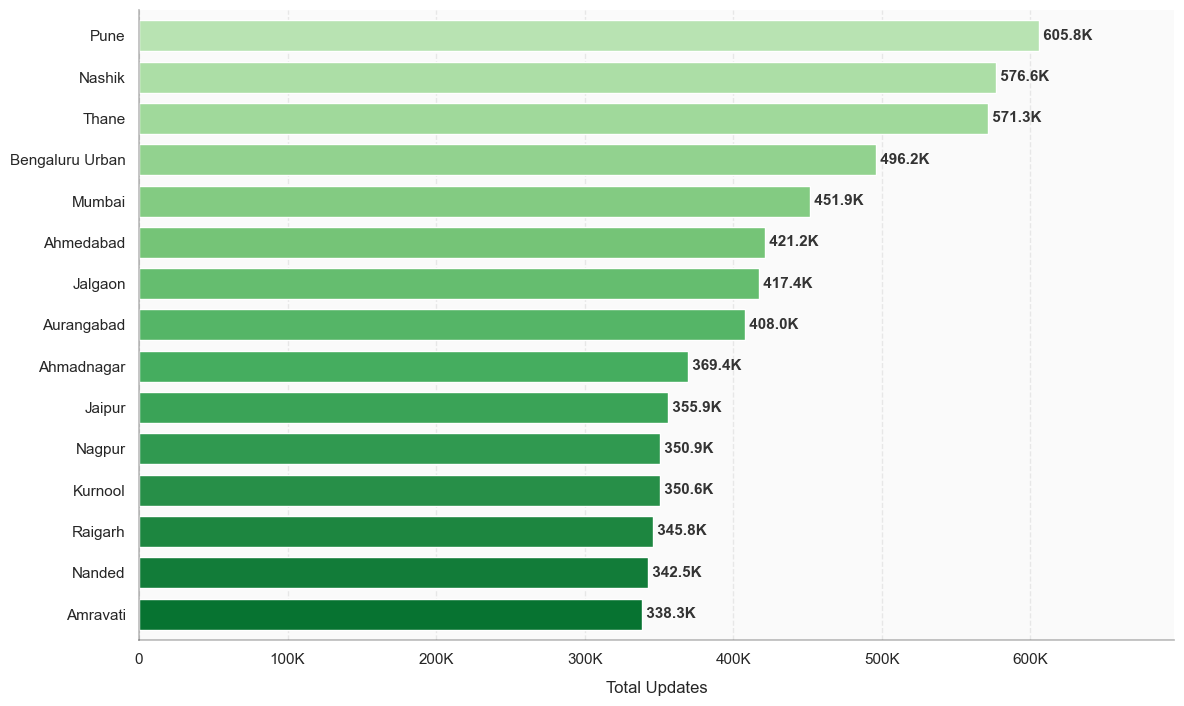

In [205]:
# --- Data Preparation (Biometric) ---
# Summing biometric components for district-level analysis
biometric['total_updates'] = biometric['bio_age_5_17'] + biometric['bio_age_17+']
top_districts_bio = biometric.groupby('district')['total_updates'].sum().nlargest(15).sort_values()

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 8))

# --- Gradient Logic ---
# cm.Greens(0.85) is dark, cm.Greens(0.3) is light.
# top_districts_bio is sorted ascending (top bar is the max).
# We linspace from dark (0.85) to light (0.3) so the highest bar is the lightest.
colors = cm.Greens(np.linspace(0.85, 0.3, len(top_districts_bio)))

# Plot
top_districts_bio.plot(kind='barh', color=colors, width=0.75, ax=ax)

# --- Titles & Labels ---
#fig.text(x=0.08, y=0.96, s='Top 15 Districts by Biometric Update Volume', 
#         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s='Aggregated biometric updates (Children and Adults combined)', 
#         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

plt.xlabel('Total Updates', fontsize=12, labelpad=10)
plt.ylabel('') 
plt.grid(axis='x', linestyle='--', alpha=0.4)

# --- Format X-Axis Ticks (M/K) ---
def human_format_axis(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    return str(int(x))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(human_format_axis))

# --- Add Value Labels ---
max_val = top_districts_bio.max()
for index, value in enumerate(top_districts_bio):
    if value >= 1_000_000:
        label = f' {value/1_000_000:.1f}M'
    elif value >= 1_000:
        label = f' {value/1_000:.1f}K'
    else:
        label = f' {int(value)}'
    
    plt.text(value, index, label, va='center', fontsize=11, fontweight='bold', color='#333333')

# --- Aesthetics & Layout ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)
ax.spines['left'].set_alpha(0.3)

# Ensure labels don't get cut off
ax.set_xlim(0, max_val * 1.15)

plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save to Biometric folder
plt.savefig('Biometric Images/Biometric_top_districts_bar.png', dpi=300, bbox_inches='tight')
plt.show()

In [206]:
print(biometric['date'].dtype)

datetime64[ns]


In [207]:
print(f"{round(biometric['total_updates'].sum()/10**6, 2)}M")

69.76M


C:\Users\priya\AppData\Local\Temp\ipykernel_11836\191185461.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


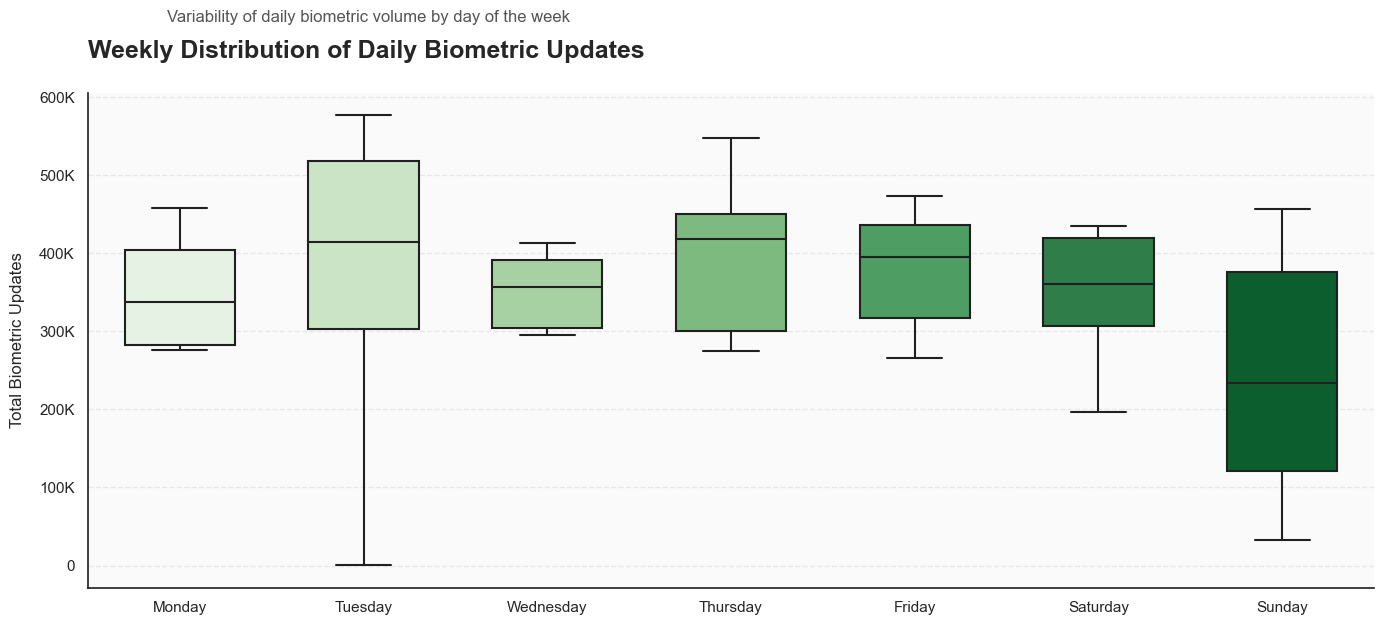

In [208]:
# --- 1. Fix the missing column and Aggregate ---
biometric['date'] = pd.to_datetime(biometric['date'])

# CREATE the Day_Name column from the date
biometric['Day_Name'] = biometric['date'].dt.day_name()

# Calculate total daily updates for biometrics
biometric['total_daily_sum'] = biometric['bio_age_5_17'] + biometric['bio_age_17+']

# Group by date and Day_Name to get a single volume number per day across all regions
daily_totals_bio = biometric.groupby(['date', 'Day_Name'])['total_daily_sum'].sum().reset_index()

# --- 2. Plotting ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(14, 7))

# Using a refined Green palette to match the Biometric theme
sns.boxplot(
    data=daily_totals_bio,
    x='Day_Name', 
    y='total_daily_sum', 
    order=day_order, 
    palette='Greens', 
    showfliers=False, 
    width=0.6,
    linewidth=1.5
)

# --- Formatting ---
plt.title('Weekly Distribution of Daily Biometric Updates', fontsize=18, fontweight='bold', pad=25, loc='left')
plt.suptitle('Variability of daily biometric volume by day of the week', 
             fontsize=12, color='#555555', x=0.125, y=0.92, ha='left')

plt.ylabel('Total Biometric Updates', fontsize=12, labelpad=10)
plt.xlabel('')

# Helper for K/M labels on the Y-Axis
def human_format(x, pos):
    if x >= 1_000_000: return f'{x/1_000_000:.1f}M'
    if x >= 1_000: return f'{x/1_000:.0f}K'
    return str(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

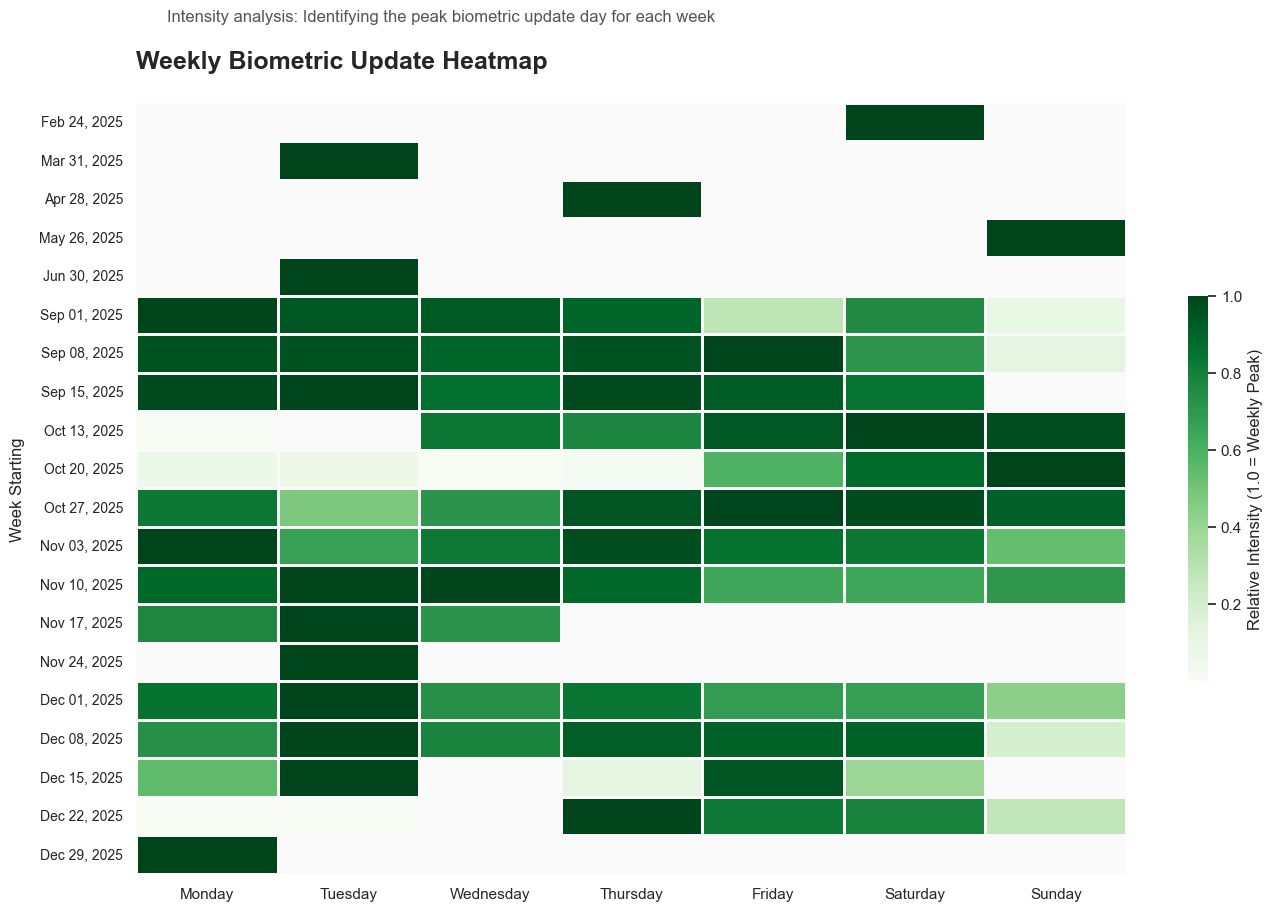

In [209]:
# --- 1. Data Processing & Aggregation (Biometric) ---
# Ensure date is datetime and columns exist
biometric['date'] = pd.to_datetime(biometric['date'])
biometric['Day_Name'] = biometric['date'].dt.day_name()
biometric['total_daily_sum'] = biometric['bio_age_5_17'] + biometric['bio_age_17+']

# Create Week_Start and group by date to get daily totals across all regions
biometric['Week_Start'] = biometric['date'].dt.to_period('W').apply(lambda r: r.start_time)
daily_aggregated_bio = biometric.groupby(['Week_Start', 'Day_Name'])['total_daily_sum'].sum().reset_index()

# Pivot the data
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pivot_bio = daily_aggregated_bio.pivot_table(index='Week_Start', columns='Day_Name', values='total_daily_sum', aggfunc='sum')
weekly_pivot_bio = weekly_pivot_bio.reindex(columns=day_order)

# --- 2. Normalize (Row-wise) ---
# This highlights which day of each specific week had the most activity relative to that week
weekly_normalized_bio = weekly_pivot_bio.div(weekly_pivot_bio.max(axis=1), axis=0)

# --- 3. Plotting ---
plt.figure(figsize=(14, 10))

# Format Y-axis labels: "Mar 02, 2025"
yticklabels = [date.strftime('%b %d, %Y') for date in weekly_normalized_bio.index]

sns.heatmap(
    weekly_normalized_bio, 
    cmap='Greens', 
    linewidths=0.8, 
    linecolor='#fafafa',
    yticklabels=yticklabels,
    cbar_kws={'label': 'Relative Intensity (1.0 = Weekly Peak)', 'shrink': 0.5}
)

# --- Formatting ---
plt.title('Weekly Biometric Update Heatmap', fontsize=18, fontweight='bold', pad=25, loc='left')
plt.suptitle('Intensity analysis: Identifying the peak biometric update day for each week', 
             fontsize=12, color='#555555', x=0.125, y=0.94, ha='left')

plt.ylabel('Week Starting', fontsize=12, labelpad=10)
plt.xlabel('')
plt.xticks(rotation=0, fontsize=11) 
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_11836\2982672924.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  days = day_counts[i]


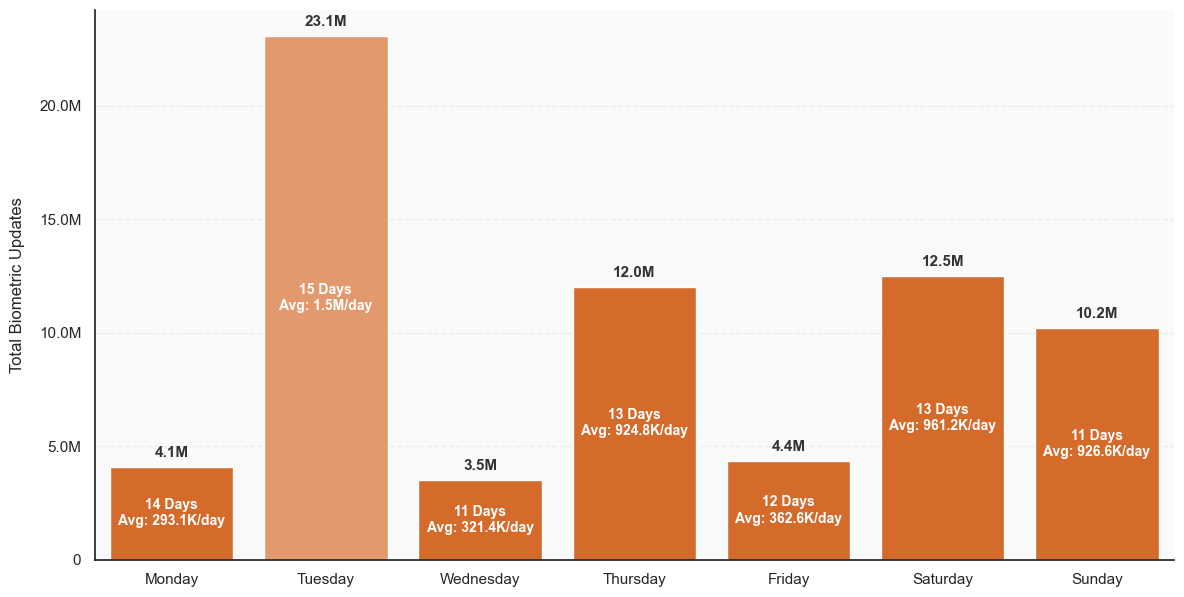

In [210]:
# --- 1. Data Preparation (Biometric) ---
# Ensure date format and create total biometric updates column
biometric['date'] = pd.to_datetime(biometric['date'])
biometric['Day_Name'] = biometric['date'].dt.day_name()
biometric['total_updates'] = biometric['bio_age_5_17'] + biometric['bio_age_17+']

# Aggregation
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sums = biometric.groupby('Day_Name')['total_updates'].sum().reindex(day_order)
day_counts = biometric.groupby('Day_Name')['date'].nunique().reindex(day_order)

# --- 2. Helper Formatter ---
def human_format(num, pos=None):
    if num >= 1_000_000:
        return f'{num/1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num/1_000:.1f}K'
    else:
        return str(int(num))

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(12, 7))

# Peak Day = Aadhaar Orange, Other Days = Aadhaar Green
max_value = daily_sums.max()
# Using the darkened/deepened brand colors for clarity
colors = ['#f69459' if x == max_value else '#f2640e' for x in daily_sums]

# Plot Bar Chart
sns.barplot(x=daily_sums.index, y=daily_sums.values, palette=colors, width=0.8, ax=ax, hue=daily_sums.index, legend=False)

# --- 4. Adding Dynamic Labels ---
for i, p in enumerate(ax.patches):
    height = p.get_height()
    days = day_counts[i]
    avg = height / days if days > 0 else 0
    
    # A. Top Label: Total Volume
    vol_label = human_format(height)
    ax.annotate(vol_label, 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', xytext=(0, 5), 
                textcoords='offset points', fontsize=11, fontweight='bold', color='#333333')
    
    # B. Middle Label: Efficiency Stats
    avg_label = human_format(avg)
    if height > 0:
        info_text = f'{days} Days\nAvg: {avg_label}/day'
        ax.text(p.get_x() + p.get_width() / 2., height / 2, 
                info_text, ha='center', va='center', 
                color='white', fontsize=10, fontweight='bold')

# --- 5. Formatting & Titles ---
#fig.text(x=0.08, y=0.96, s='Day-wise Biometric Update Distribution', 
#         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s='Total biometric volume and daily averages (Aadhaar Branded)', 
#         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

plt.ylabel('Total Biometric Updates', fontsize=12, labelpad=10)
plt.xlabel('')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save to Biometric Images folder
plt.savefig('Biometric Images/Day_wise_biometric_updates.png', dpi=300, bbox_inches='tight')
plt.show()

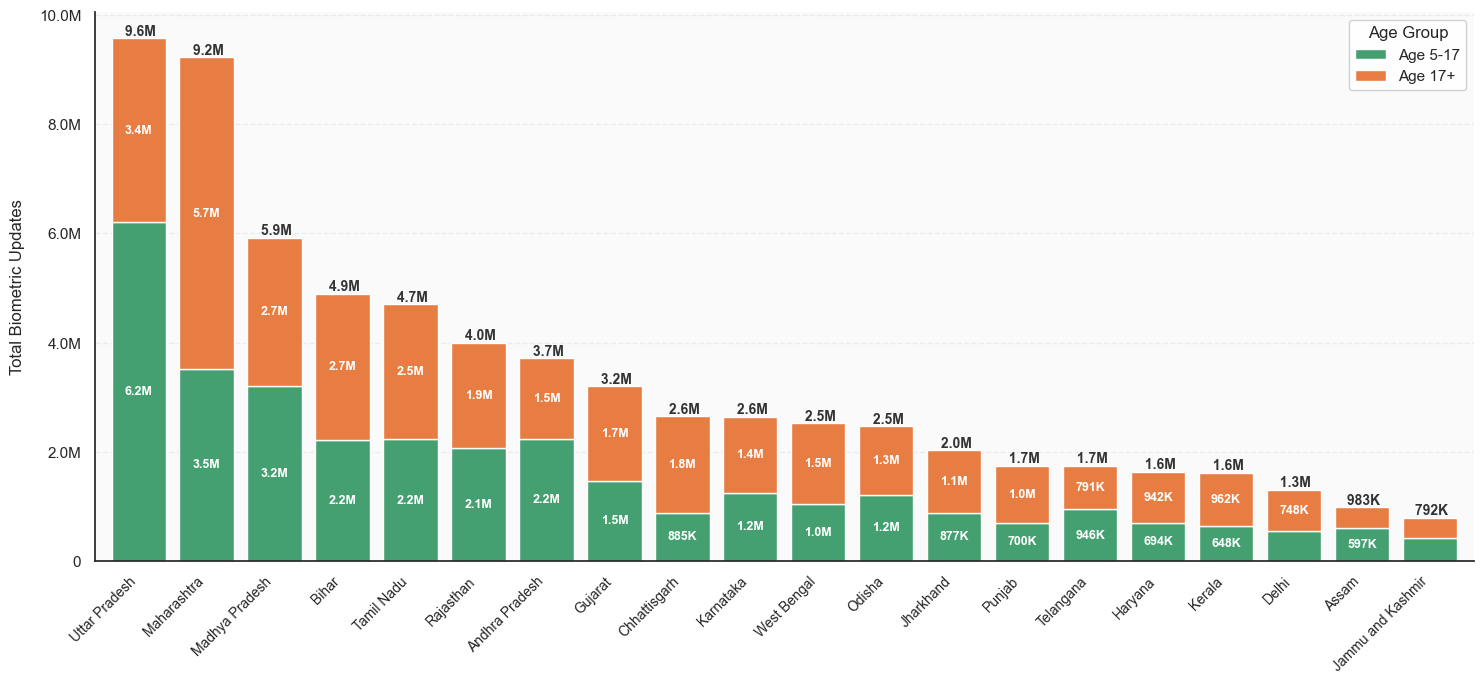

In [211]:
# --- 1. Data Preparation (Biometric) ---
# Demographic columns available in the biometric dataset
bio_age_cols = ['bio_age_5_17', 'bio_age_17+']

# Group by State and sum biometric update volumes
state_group_bio = biometric.groupby('state')[bio_age_cols].sum()

# Calculate Total for sorting
state_group_bio['Total'] = state_group_bio.sum(axis=1)

# Sort descending and take Top 20
state_group_bio = state_group_bio.sort_values('Total', ascending=False).head(20)

# Extract Totals for the Top Label logic
totals_bio = state_group_bio['Total'].values 

# Prepare data for plotting
plot_data_bio = state_group_bio.drop(columns='Total')
plot_data_bio.columns = ['Age 5-17', 'Age 17+']

# --- 2. Helper Formatter (Dynamic K/M) ---
def human_format(num, pos=None):
    if num >= 1_000_000: return f'{num/1_000_000:.1f}M'
    if num >= 1_000: return f'{num/1_000:.0f}K'
    return f'{num:.0f}'

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(15, 8))

# UPDATE: Deepened Aadhaar Brand Colors
# Deep Green for 5-17, Deep Orange for 17+
brand_colors = ['#45A071', '#E87D43']

# Create Stacked Bar Chart
plot_data_bio.plot(kind='bar', stacked=True, width=0.8, color=brand_colors, ax=ax)

# --- 4. Titles ---
#fig.text(x=0.08, y=0.96, s='State-wise Biometric Updates by Age Group', 
#         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s='Total volume breakdown for top 20 states (Biometric Context)', 
#         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- 5. Logic for LABELS ---

# A. Inside Labels (Segments)
for container in ax.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()
        y_pos = bar.get_y()
        x_pos = bar.get_x()
        width = bar.get_width()
        
        # Only show label if the segment is large enough to contain text (Threshold: 6%)
        if height > (totals_bio.max() * 0.06): 
            label_text = human_format(height)
            ax.text(x_pos + width/2, y_pos + height/2, label_text, 
                    ha='center', va='center', color='white', 
                    fontsize=9, fontweight='bold')

# B. Top Labels (Total Updates)
for i, total_val in enumerate(totals_bio):
    label_text = human_format(total_val)
    ax.text(i, total_val, f' {label_text}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='#333333')

# --- 6. Styling ---
plt.ylabel('Total Biometric Updates', fontsize=12, labelpad=10)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Apply Formatter to Y-Axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Legend
plt.legend(title='Age Group', frameon=True, loc='upper right', facecolor='white', framealpha=0.9)

# Grid & Aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

# Adjust layout for titles
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save to Biometric folder
plt.savefig('Biometric Images/State_Age_wise_biometric_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

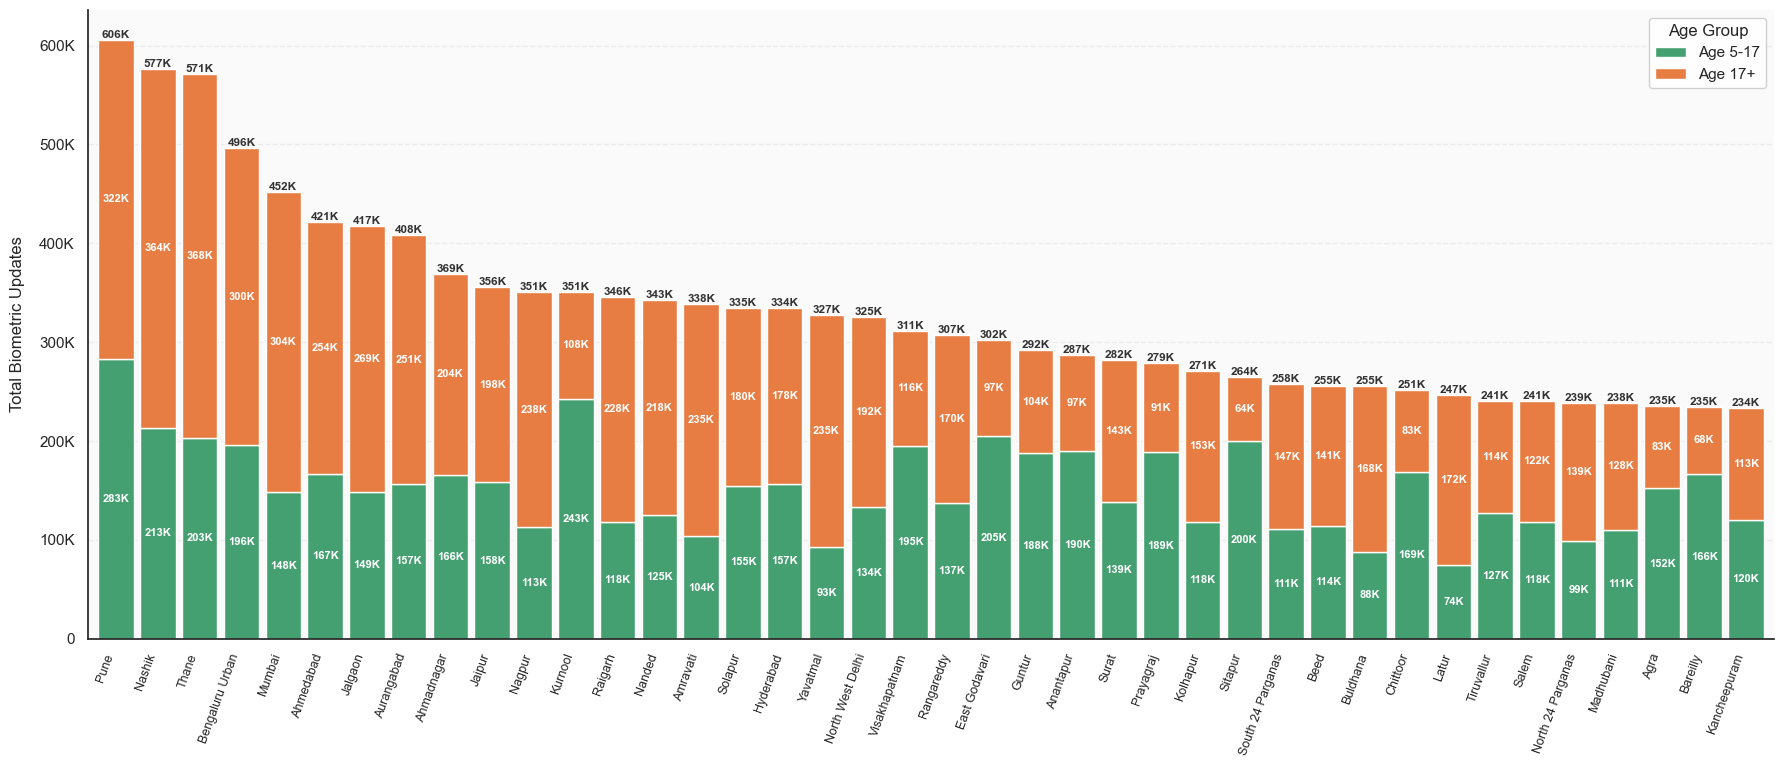

In [212]:
# --- 1. Data Preparation (Biometric) ---
# Update columns for Biometric context
bio_age_cols = ['bio_age_5_17', 'bio_age_17+']

# Check correct column name for District
group_col = 'district' if 'district' in biometric.columns else 'District'

# Group and Sum
districts_group_bio = biometric.groupby(group_col)[bio_age_cols].sum()

# Calculate 'Total' for sorting
districts_group_bio['Total'] = districts_group_bio.sum(axis=1)

# Sort descending and Keep Top 40
districts_group_bio = districts_group_bio.sort_values('Total', ascending=False).head(40)

# Save Totals for Thresholds & Top Labels
max_total_bio = districts_group_bio['Total'].max()
totals_bio = districts_group_bio['Total'].values

# Drop 'Total' for plotting
plot_data_bio = districts_group_bio.drop(columns='Total')
plot_data_bio.columns = ['Age 5-17', 'Age 17+']

# --- 2. Helper Formatter (K/M) ---
def human_format(num, pos=None):
    if num >= 1_000_000: return f'{num/1_000_000:.1f}M'
    if num >= 1_000: return f'{num/1_000:.0f}K'
    return f'{num:.0f}'

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(18, 9)) 

# Aadhaar Brand Colors: Deep Green for 5-17, Deep Orange for 17+
brand_colors = ['#45A071', '#E87D43'] 

# Create Stacked Bar Chart
plot_data_bio.plot(kind='bar', stacked=True, width=0.85, color=brand_colors, ax=ax)

# --- 4. Titles ---
#fig.text(x=0.08, y=0.96, s='District-wise Biometric Update Breakdown (Top 40)', 
#         fontsize=22, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.91, s='Detailed age breakdown for highest volume districts (Biometric Context)', 
#         fontsize=14, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- 5. LABEL LOGIC ---

# A. Internal Labels (Segments)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        
        # Only label if segment is > 7% of the tallest bar to avoid clutter
        if height > (max_total_bio * 0.07): 
            label_text = human_format(height)
            ax.text(x + width/2, y + height/2, label_text, 
                    ha='center', va='center', color='white', 
                    fontsize=8, fontweight='bold')

# B. Top Labels (Horizontal Totals)
for i, total_val in enumerate(totals_bio):
    label_text = human_format(total_val)
    ax.text(i, total_val, label_text, 
            ha='center', va='bottom', fontsize=8.5, fontweight='bold', color='#333333', rotation=0)

# --- 6. Styling ---
plt.ylabel('Total Biometric Updates', fontsize=12, labelpad=10)
plt.xlabel('')
plt.xticks(rotation=70, ha='right', fontsize=9)

# Apply Formatter to Y-Axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Legend
plt.legend(title='Age Group', frameon=True, loc='upper right', facecolor='white', framealpha=0.9)

# Grid & Spines
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save to Biometric folder
plt.savefig('Biometric Images/District_Age_wise_biometric_updates_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

Pareto Insight: The top 346 districts account for 80% of total biometric updates.


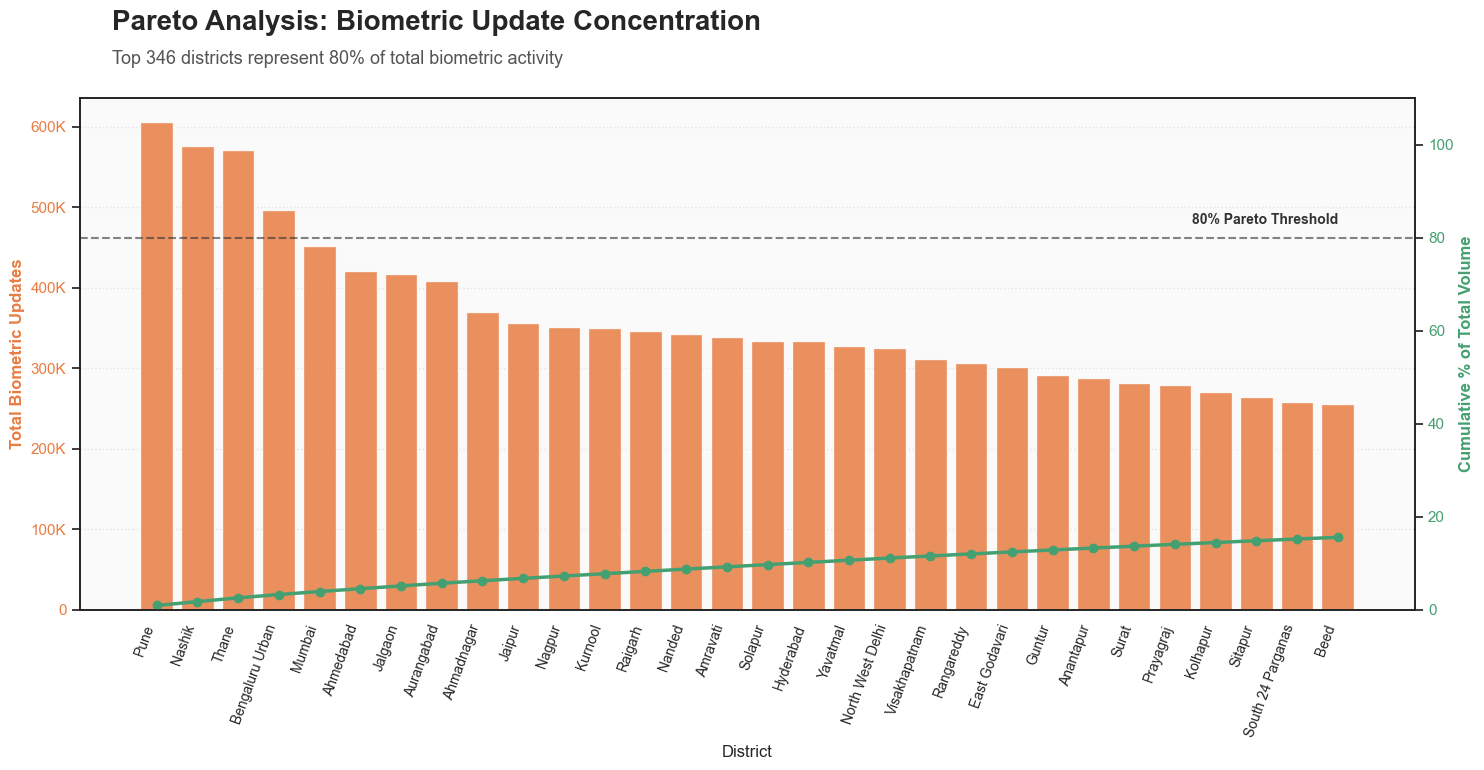

In [213]:
# --- 1. Data Preparation (Biometric) ---
# Sum total biometric updates per district
biometric['total_updates'] = biometric['bio_age_5_17'] + biometric['bio_age_17+']
district_counts_bio = biometric.groupby('district')['total_updates'].sum().sort_values(ascending=False)
total_volume_bio = district_counts_bio.sum()

# Calculate Cumulative Percentage
cumulative_percent_bio = district_counts_bio.cumsum() / total_volume_bio * 100

# Identify the "80% Cutoff"
cutoff_index_bio = cumulative_percent_bio[cumulative_percent_bio <= 80].count()
print(f"Pareto Insight: The top {cutoff_index_bio} districts account for 80% of total biometric updates.")

# --- 2. Plotting (Dual Axis) ---
fig, ax1 = plt.subplots(figsize=(15, 8))

# Show Top 30 for readability
top_n = 30
district_subset = district_counts_bio.head(top_n)
cum_subset = cumulative_percent_bio.head(top_n)

# Bar Chart (Volume) - Aadhaar Orange
ax1.bar(district_subset.index, district_subset.values, color='#E87D43', alpha=0.85, label='Biometric Update Volume')
ax1.set_ylabel('Total Biometric Updates', color='#E87D43', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#E87D43')
ax1.set_xlabel('District', fontsize=12)

# Format X-axis
ax1.set_xticks(range(len(district_subset)))
ax1.set_xticklabels(district_subset.index, rotation=70, ha='right', fontsize=10)

# Line Chart (Cumulative %) - Aadhaar Green
ax2 = ax1.twinx()
ax2.plot(district_subset.index, cum_subset.values, color='#45A071', marker='o', ms=6, linewidth=2.5, label='Cumulative %')
ax2.set_ylabel('Cumulative % of Total Volume', color='#45A071', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#45A071')
ax2.set_ylim(0, 110)

# --- 3. Formatting & Annotations ---
# 80% Reference Line
ax2.axhline(80, color='#333333', linestyle='--', linewidth=1.5, alpha=0.6)
ax2.annotate('80% Pareto Threshold', xy=(0, 80), xytext=(top_n-1, 83),
             color='#333333', ha='right', fontweight='bold', fontsize=10)

# Helper for Y-axis K/M formatting
def human_format(x, pos):
    if x >= 1_000_000: return f'{x/1_000_000:.1f}M'
    if x >= 1_000: return f'{x/1_000:.0f}K'
    return str(int(x))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Titles
fig.text(x=0.08, y=0.96, s='Pareto Analysis: Biometric Update Concentration', 
         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
fig.text(x=0.08, y=0.91, s=f'Top {cutoff_index_bio} districts represent 80% of total biometric activity', 
         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# Aesthetics
ax1.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()

Top 12 states contribute to ~80% of biometric volume.


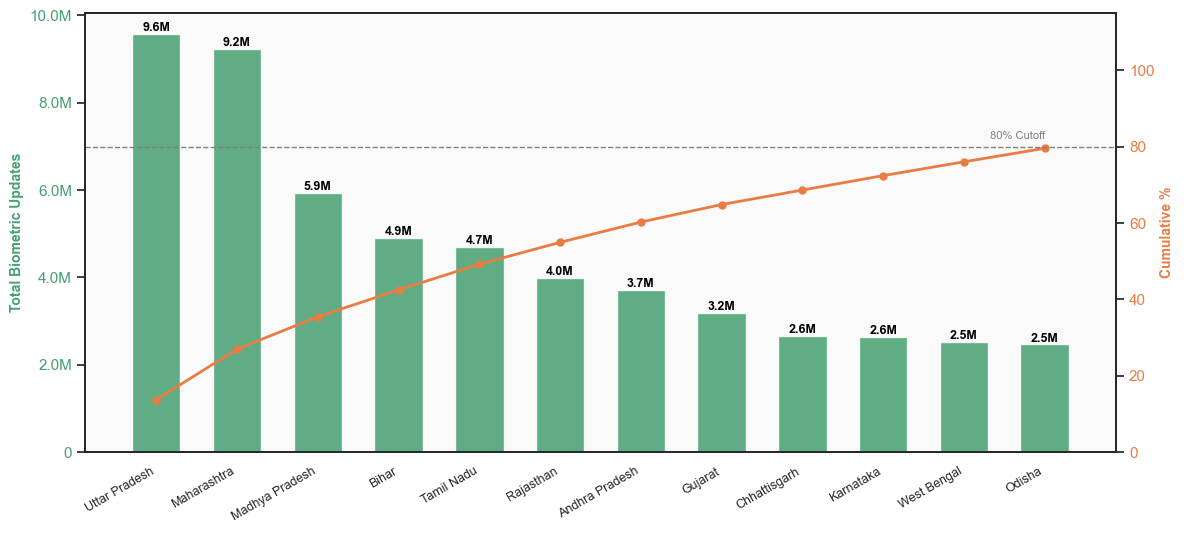

In [214]:
# --- 1. Data Preparation (Biometric) ---
# Ensure date format
biometric['date'] = pd.to_datetime(biometric['date'])
if 'state' in biometric.columns:
    biometric['state'] = biometric['state'].astype(str).str.strip()

# Calculate Total Updates metric for Biometrics
biometric['total_updates'] = biometric['bio_age_5_17'] + biometric['bio_age_17+']

# FILTER: Entire History (March 2025 - Jan 2026)
start_date = '2025-03-01'
end_date = '2026-01-31'
mask = (biometric['date'] >= start_date) & (biometric['date'] <= end_date)
filtered_df = biometric.loc[mask].copy()

# --- 2. Pareto Calculation ---
state_stats = filtered_df.groupby('state')['total_updates'].sum().sort_values(ascending=False)
total_volume = state_stats.sum()
cum_percent = state_stats.cumsum() / total_volume * 100

# Identify 80% Cutoff
cutoff_count = cum_percent[cum_percent <= 80].count()
if cutoff_count == 0: cutoff_count = 1
print(f"Top {cutoff_count} states contribute to ~80% of biometric volume.")

# Limit to Top 11 for consistency with your rigid view
top_n = 12
plot_vol = state_stats.head(top_n)
plot_cum = cum_percent.head(top_n)

# --- 3. Plotting ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Aadhaar Brand Colors
bar_color = '#45A071'  # Deepened Aadhaar Green
line_color = '#E87D43' # Deepened Aadhaar Orange

# A. Bar Chart (Volume) - GREEN
bars = ax1.bar(plot_vol.index, plot_vol.values, color=bar_color, alpha=0.85, width=0.6)
ax1.set_ylabel('Total Biometric Updates', color=bar_color, fontsize=10, fontweight='bold')
ax1.set_xlabel('', fontsize=10, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=bar_color)

# Set Ticks
ax1.set_xticks(range(len(plot_vol.index)))
ax1.set_xticklabels(plot_vol.index, rotation=30, ha='right', fontsize=9)

# Format Y-axis (M/K)
def human_format(num, pos=None):
    if num >= 1e6: return f'{num/1e6:.1f}M'
    if num >= 1e3: return f'{num/1e3:.0f}K'
    return f'{num:.0f}'

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Add Value Labels
for bar in bars:
    height = bar.get_height()
    label = human_format(height)
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             label,
             ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# B. Line Chart (Cumulative %) - ORANGE
ax2 = ax1.twinx()
ax2.plot(range(len(plot_cum)), plot_cum.values, color=line_color, marker='o', ms=5, linewidth=2)
ax2.set_ylabel('Cumulative %', color=line_color, fontsize=10, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=line_color)
ax2.set_ylim(0, 115) 

# C. 80% Reference Line
ax2.axhline(80, color='grey', linestyle='--', linewidth=1)
ax2.text(len(plot_vol)-1, 82, '80% Cutoff', color='grey', ha='right', fontsize=8)

# Titles
#fig.text(x=0.08, y=0.96, s='State-wise Biometric Pareto Analysis (Top 10)', 
#         fontsize=16, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.08, y=0.92, s=f'Top {cutoff_count} states account for 80% of total biometric volume', 
#         fontsize=11, color='#555555', ha='left', va='top', fontfamily='sans-serif')

plt.grid(axis='x', alpha=0.1)
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save to Biometric folder
plt.savefig('Biometric Images/biometric_pareto_analysis_states.png', dpi=300, bbox_inches='tight')

plt.show()